# Rotating Coild Data Analysis for SI S15 Skew Excitation (M2)

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
from scipy.interpolate import interp1d
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
magfiles = {
    'S15-004': [
        '2018-10-02_10-39-40_S15-004_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_10-40-04_S15-004_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_10-40-29_S15-004_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_10-40-52_S15-004_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_10-41-16_S15-004_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_10-41-40_S15-004_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-02_10-42-03_S15-004_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_10-42-28_S15-004_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_10-42-51_S15-004_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_10-43-16_S15-004_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_10-43-40_S15-004_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_10-44-04_S15-004_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_10-44-29_S15-004_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_10-44-52_S15-004_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_10-45-17_S15-004_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_10-45-40_S15-004_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-02_10-46-05_S15-004_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_10-46-29_S15-004_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_10-46-52_S15-004_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_10-47-17_S15-004_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_10-47-42_S15-004_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-006': [
        '2018-10-02_15-02-57_S15-006_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_15-03-22_S15-006_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_15-03-45_S15-006_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_15-04-10_S15-006_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_15-04-34_S15-006_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_15-04-59_S15-006_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-02_15-05-22_S15-006_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-02_15-05-47_S15-006_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-02_15-06-11_S15-006_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-02_15-06-35_S15-006_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-02_15-06-59_S15-006_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-02_15-07-23_S15-006_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_15-07-48_S15-006_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_15-08-11_S15-006_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_15-08-35_S15-006_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_15-09-00_S15-006_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-02_15-09-25_S15-006_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-02_15-09-49_S15-006_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-02_15-10-13_S15-006_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-02_15-10-37_S15-006_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-02_15-11-01_S15-006_BG_Imc=+0168A_Iqs=-0000A.dat', 
    ],
    'S15-052': [
        '2018-10-03_12-23-47_S15-052_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_12-24-10_S15-052_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_12-24-34_S15-052_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_12-24-59_S15-052_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_12-25-22_S15-052_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_12-25-46_S15-052_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-03_12-26-10_S15-052_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_12-26-35_S15-052_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_12-26-59_S15-052_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_12-27-23_S15-052_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_12-27-48_S15-052_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_12-28-11_S15-052_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_12-28-36_S15-052_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_12-29-00_S15-052_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_12-29-23_S15-052_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_12-29-48_S15-052_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-03_12-30-12_S15-052_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_12-30-36_S15-052_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_12-31-01_S15-052_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_12-31-24_S15-052_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_12-31-49_S15-052_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-070': [
        '2018-10-03_10-33-30_S15-070_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_10-33-54_S15-070_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_10-34-17_S15-070_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_10-34-42_S15-070_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_10-35-07_S15-070_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_10-35-32_S15-070_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-03_10-35-56_S15-070_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-03_10-36-21_S15-070_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-03_10-36-44_S15-070_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-03_10-37-08_S15-070_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-03_10-37-33_S15-070_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-03_10-37-56_S15-070_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_10-38-21_S15-070_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_10-38-46_S15-070_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_10-39-10_S15-070_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_10-39-35_S15-070_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-03_10-39-58_S15-070_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-03_10-40-23_S15-070_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-03_10-40-47_S15-070_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-03_10-41-10_S15-070_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-03_10-41-35_S15-070_BG_Imc=+0168A_Iqs=-0000A.dat', 
    ],
    'S15-236': [
        '2018-10-01_11-54-13_S15-236_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-01_11-54-36_S15-236_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_11-55-01_S15-236_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_11-55-25_S15-236_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_11-55-50_S15-236_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_11-56-13_S15-236_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-01_11-56-38_S15-236_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_11-57-02_S15-236_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_11-57-26_S15-236_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_11-57-51_S15-236_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_11-58-14_S15-236_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-01_11-58-39_S15-236_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_11-59-03_S15-236_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_11-59-28_S15-236_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_11-59-52_S15-236_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_12-00-15_S15-236_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-01_12-00-40_S15-236_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_12-01-04_S15-236_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_12-01-29_S15-236_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_12-01-53_S15-236_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_12-02-16_S15-236_BG_Imc=+0168A_Iqs=+0000A.dat', 
    ],
    'S15-248': [
        '2018-10-01_14-17-59_S15-248_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-01_14-18-24_S15-248_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_14-18-49_S15-248_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_14-19-13_S15-248_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_14-19-37_S15-248_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_14-20-01_S15-248_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-01_14-20-26_S15-248_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_14-20-50_S15-248_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_14-21-13_S15-248_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_14-21-37_S15-248_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_14-22-01_S15-248_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-01_14-22-26_S15-248_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_14-22-50_S15-248_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_14-23-13_S15-248_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_14-23-37_S15-248_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_14-24-02_S15-248_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-01_14-24-26_S15-248_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_14-24-50_S15-248_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_14-25-14_S15-248_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_14-25-39_S15-248_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_14-26-03_S15-248_BG_Imc=+0168A_Iqs=-0000A.dat', 
    ],
    'S15-256': [
        '2018-10-01_16-22-16_S15-256_BG_Imc=+0168A_Iqs=-0000A.dat', 
        '2018-10-01_16-22-39_S15-256_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_16-23-04_S15-256_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_16-23-29_S15-256_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_16-23-52_S15-256_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_16-24-17_S15-256_BG_Imc=+0168A_Iqs=+0010A.dat', 
        '2018-10-01_16-24-41_S15-256_BG_Imc=+0168A_Iqs=+0008A.dat', 
        '2018-10-01_16-25-05_S15-256_BG_Imc=+0168A_Iqs=+0006A.dat', 
        '2018-10-01_16-25-29_S15-256_BG_Imc=+0168A_Iqs=+0004A.dat', 
        '2018-10-01_16-25-54_S15-256_BG_Imc=+0168A_Iqs=+0002A.dat', 
        '2018-10-01_16-26-18_S15-256_BG_Imc=+0168A_Iqs=+0000A.dat', 
        '2018-10-01_16-26-43_S15-256_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_16-27-06_S15-256_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_16-27-31_S15-256_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_16-27-55_S15-256_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_16-28-19_S15-256_BG_Imc=+0168A_Iqs=-0010A.dat', 
        '2018-10-01_16-28-44_S15-256_BG_Imc=+0168A_Iqs=-0008A.dat', 
        '2018-10-01_16-29-08_S15-256_BG_Imc=+0168A_Iqs=-0006A.dat', 
        '2018-10-01_16-29-32_S15-256_BG_Imc=+0168A_Iqs=-0004A.dat', 
        '2018-10-01_16-29-56_S15-256_BG_Imc=+0168A_Iqs=-0002A.dat', 
        '2018-10-01_16-30-21_S15-256_BG_Imc=+0168A_Iqs=-0000A.dat', 
    ],
}

base_path = '/home/fac_files/lnls-ima/si-sextupoles-s15/model-07/measurement/magnetic/rotcoil/'
magnet_family = 'family_1/'
magnet_coil = 'main_qs/'
data_set = 'M2'


def load_rotcoil(serial, fname):
    path2 = base_path + magnet_family + serial + '/' + magnet_coil
    path3 = path2 + data_set + '/' + fname
    data = RotCoilData(path3, 1)
    return data
    
    
def load_data(magfiles):
    
    serials = tuple(magfiles.keys())
    
    shape = (len(serials), len(magfiles[serials[0]]))
    
    qs_coil_current_avg = np.zeros(shape)
    main_coil_current_avg = np.zeros(shape)
    nmpole_0 = np.zeros(shape)
    nmpole_1 = np.zeros(shape)
    nmpole_2 = np.zeros(shape)
    smpole_0 = np.zeros(shape)
    smpole_1 = np.zeros(shape)
    smpole_2 = np.zeros(shape)
    for i in range(len(serials)):
        files = magfiles[serials[i]]
        for j in range(len(files)):
            d = load_rotcoil(serials[i], files[j])
            main_coil_current_avg[i,j] = d.main_coil_current_avg
            qs_coil_current_avg[i,j] = d.qs_coil_current_avg
            nmpole_0[i,j] = d.intmpole_normal_avg[0]
            nmpole_1[i,j] = d.intmpole_normal_avg[1]
            nmpole_2[i,j] = d.intmpole_normal_avg[2]
            smpole_0[i,j] = d.intmpole_skew_avg[0]
            smpole_1[i,j] = d.intmpole_skew_avg[1]
            smpole_2[i,j] = d.intmpole_skew_avg[2]
    return serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2, 


data = load_data(magfiles)

<IPython.core.display.Javascript object>


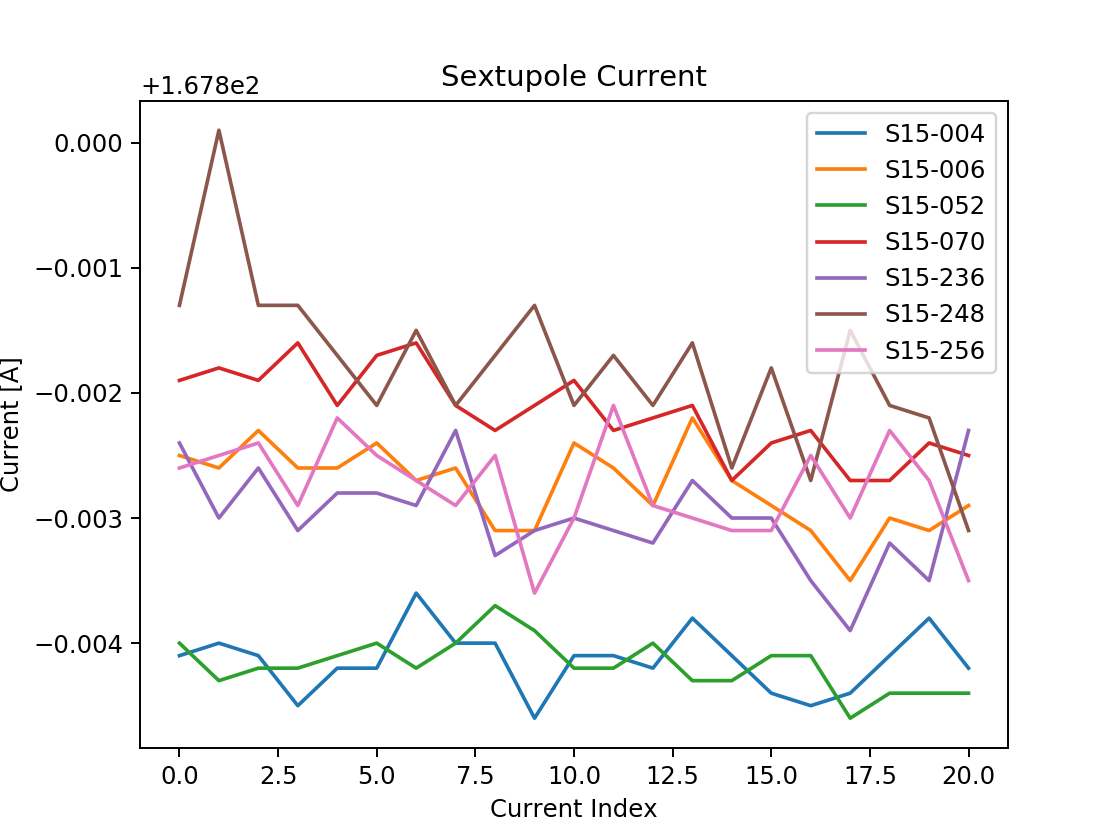

In [3]:
# Sextupole Current

serials, tdata = data[0], data[1]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Sextupole Current')
plt.legend()
plt.show()    

<IPython.core.display.Javascript object>


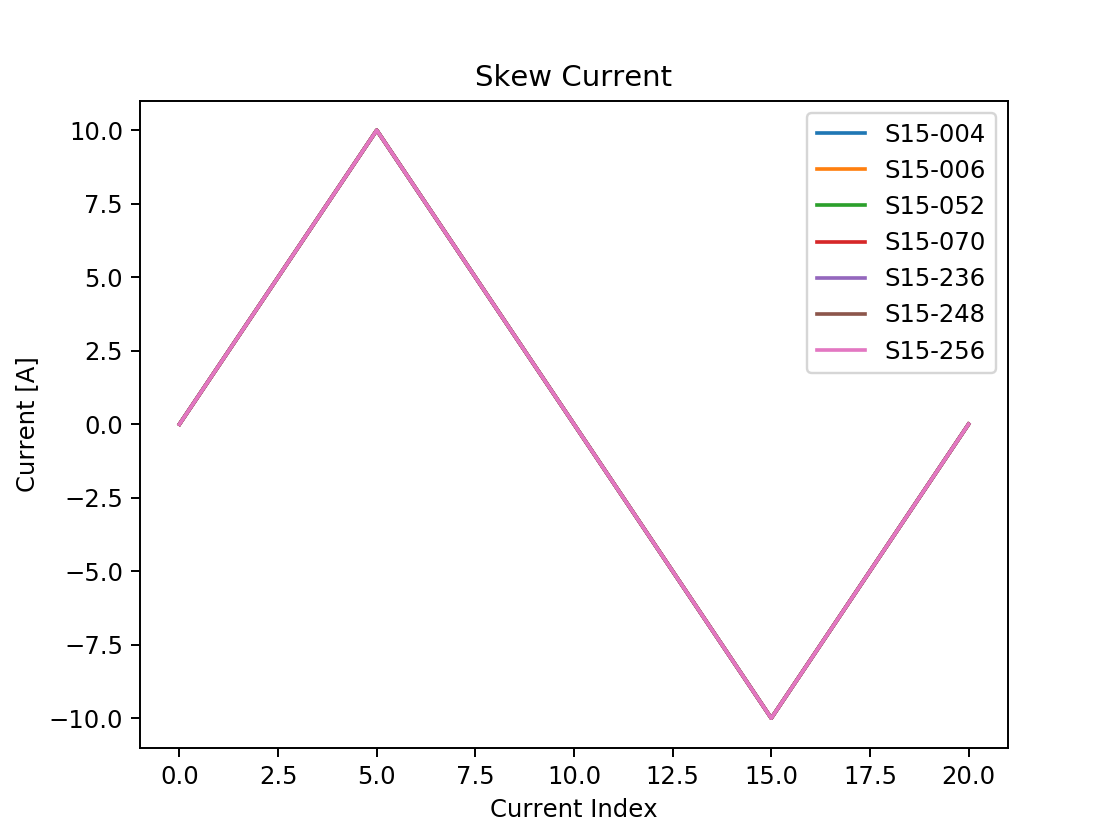

Currents:
index 00 :  +0.00 A
index 01 :  +2.00 A
index 02 :  +4.00 A
index 03 :  +6.00 A
index 04 :  +8.00 A
index 05 : +10.00 A
index 06 :  +8.00 A
index 07 :  +6.00 A
index 08 :  +4.00 A
index 09 :  +2.00 A
index 10 :  +0.00 A
index 11 :  -2.00 A
index 12 :  -4.00 A
index 13 :  -6.00 A
index 14 :  -8.00 A
index 15 : -10.00 A
index 16 :  -8.00 A
index 17 :  -6.00 A
index 18 :  -4.00 A
index 19 :  -2.00 A
index 20 :  -0.00 A


In [4]:
# Skew Coil Current

serials, tdata = data[0], data[2]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Skew Current')
plt.legend()
plt.show()

print('Currents:')
avg = np.mean(tdata,0)
for i in range(len(avg)):
    print('index {:02d} : {:+6.2f} A'.format(i, avg[i]))

<IPython.core.display.Javascript object>


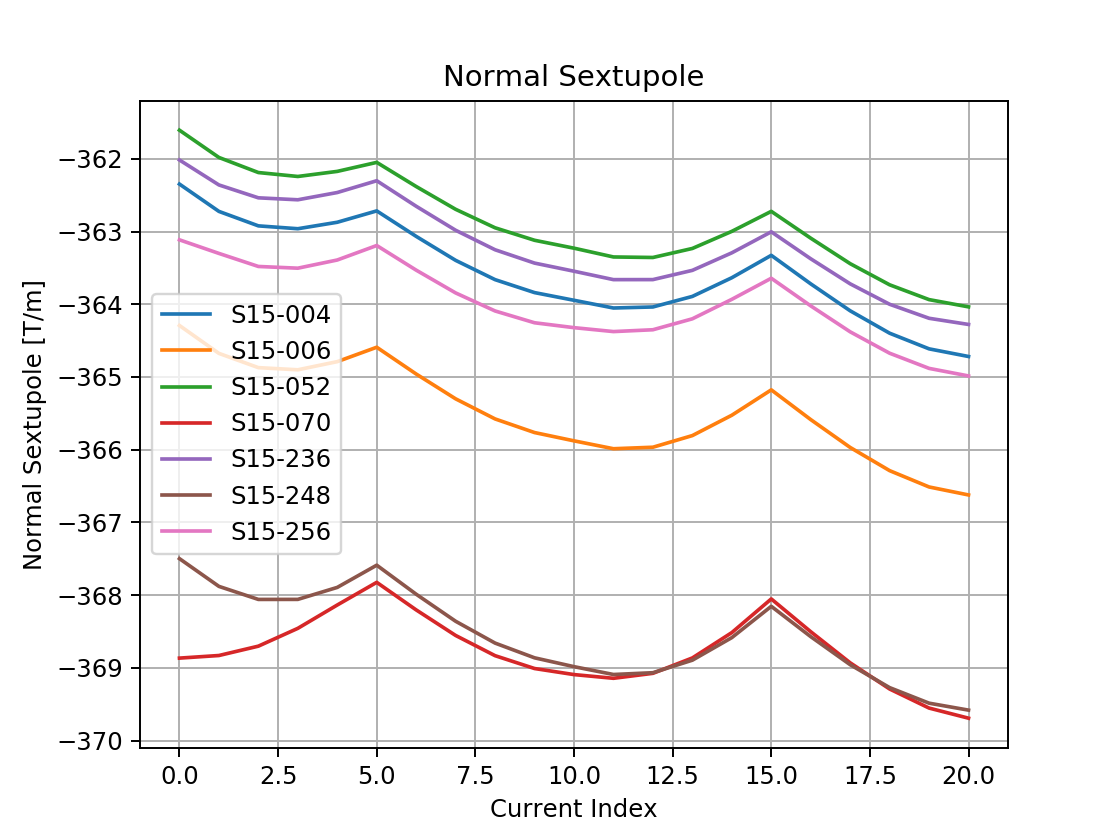

<IPython.core.display.Javascript object>


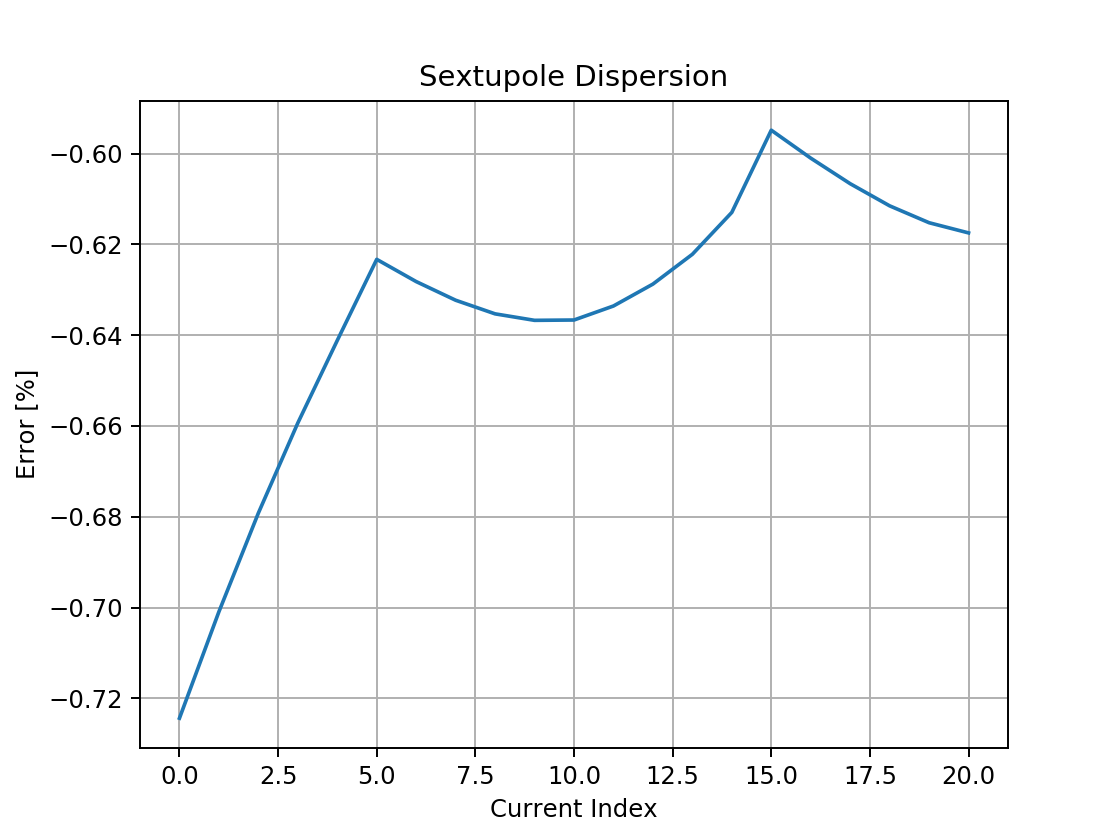

<IPython.core.display.Javascript object>


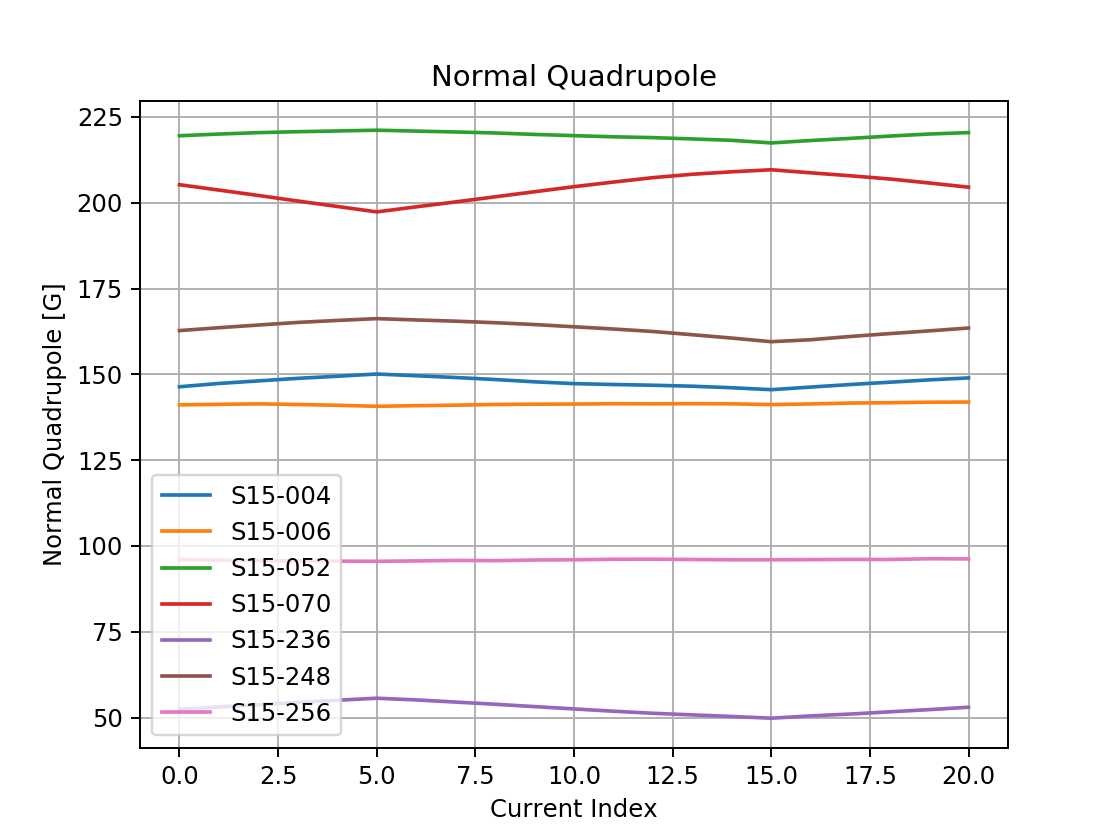

<IPython.core.display.Javascript object>


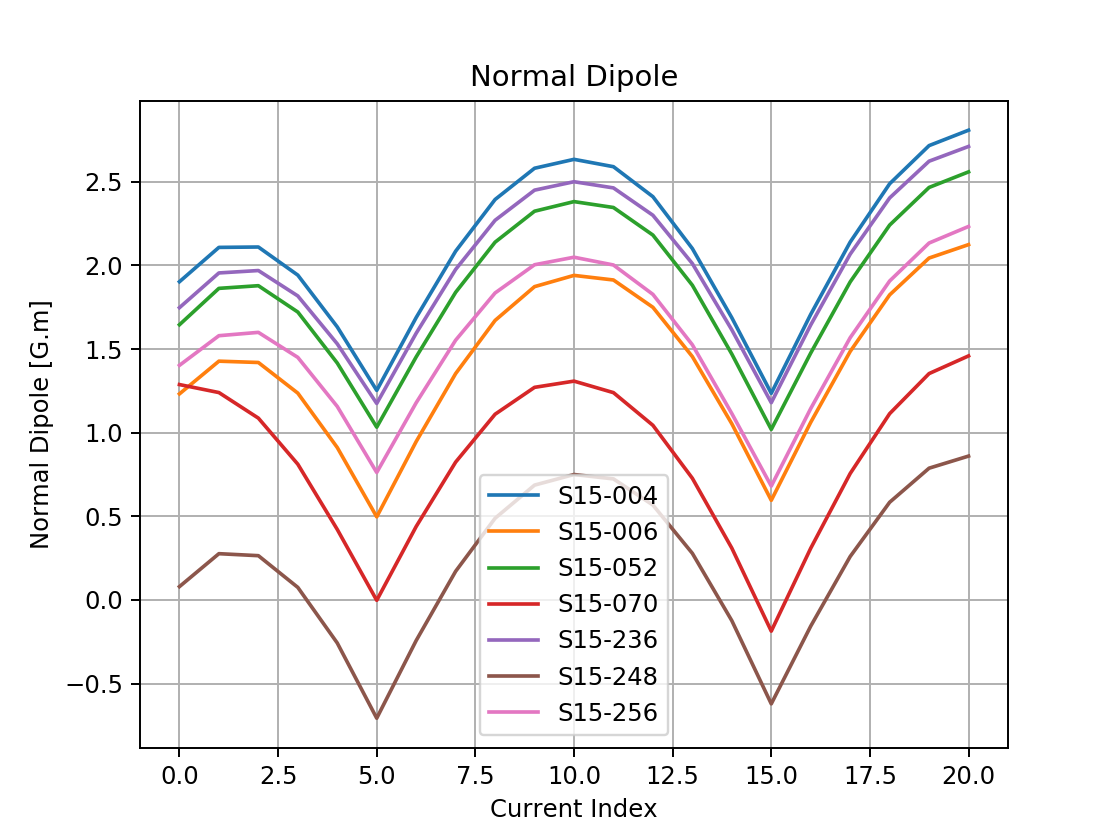

In [5]:
# Normal Sextupole
serials, tdata = data[0], data[5]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Sextupole [T/m]')
plt.title('Normal Sextupole')
plt.legend()
plt.grid()
plt.show()

avg = np.mean(tdata, 0)
std = np.std(tdata, 0)
plt.figure()
plt.plot(100*std/avg)
plt.xlabel('Current Index')
plt.ylabel('Error [%]')
plt.title('Sextupole Dispersion')
plt.grid()
plt.show()
# print(std/avg)

# Normal Quadrupole
serials, tdata = data[0], data[4]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Quadrupole [G]')
plt.title('Normal Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Normal Dipole
serials, tdata = data[0], data[3]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Dipole [G.m]')
plt.title('Normal Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


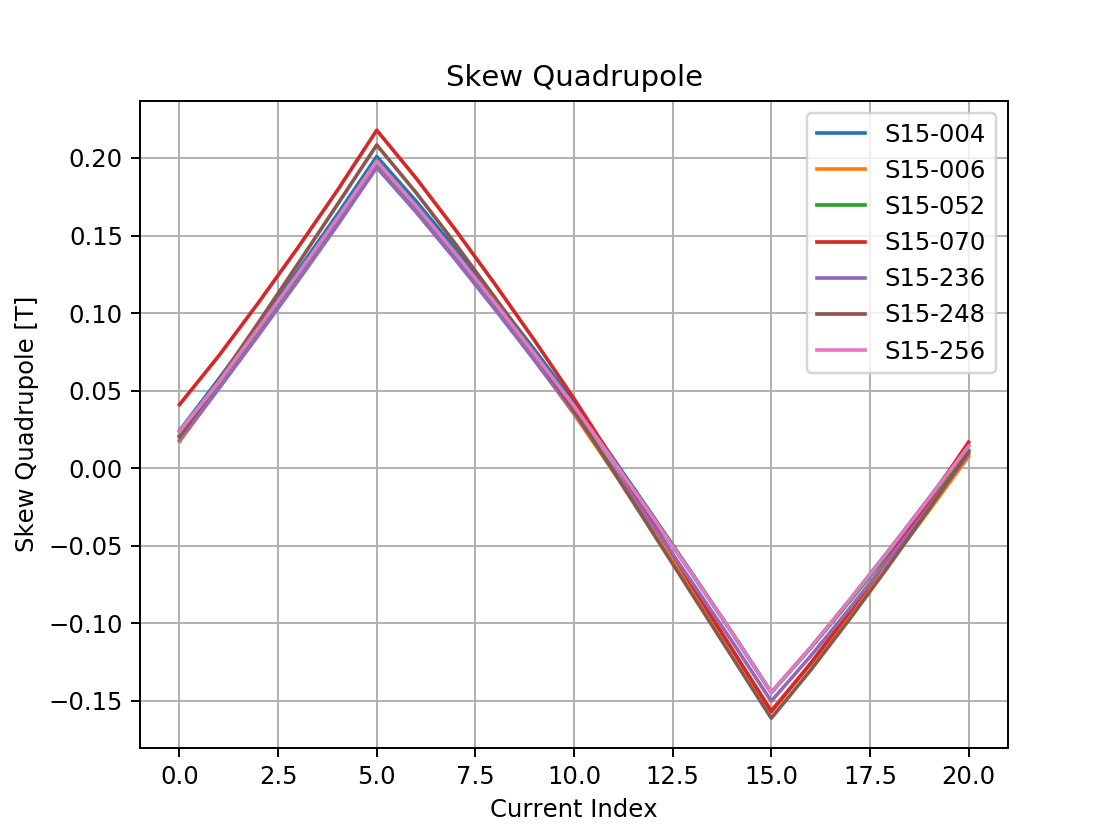

<IPython.core.display.Javascript object>


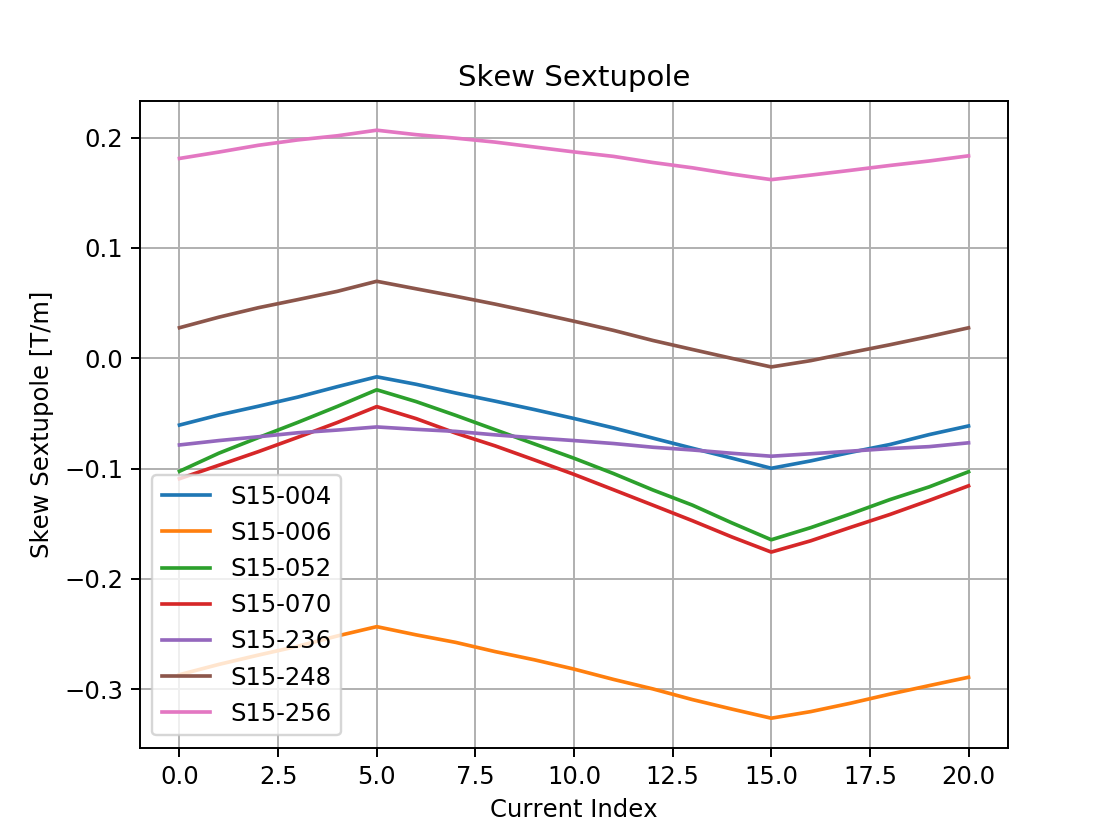

<IPython.core.display.Javascript object>


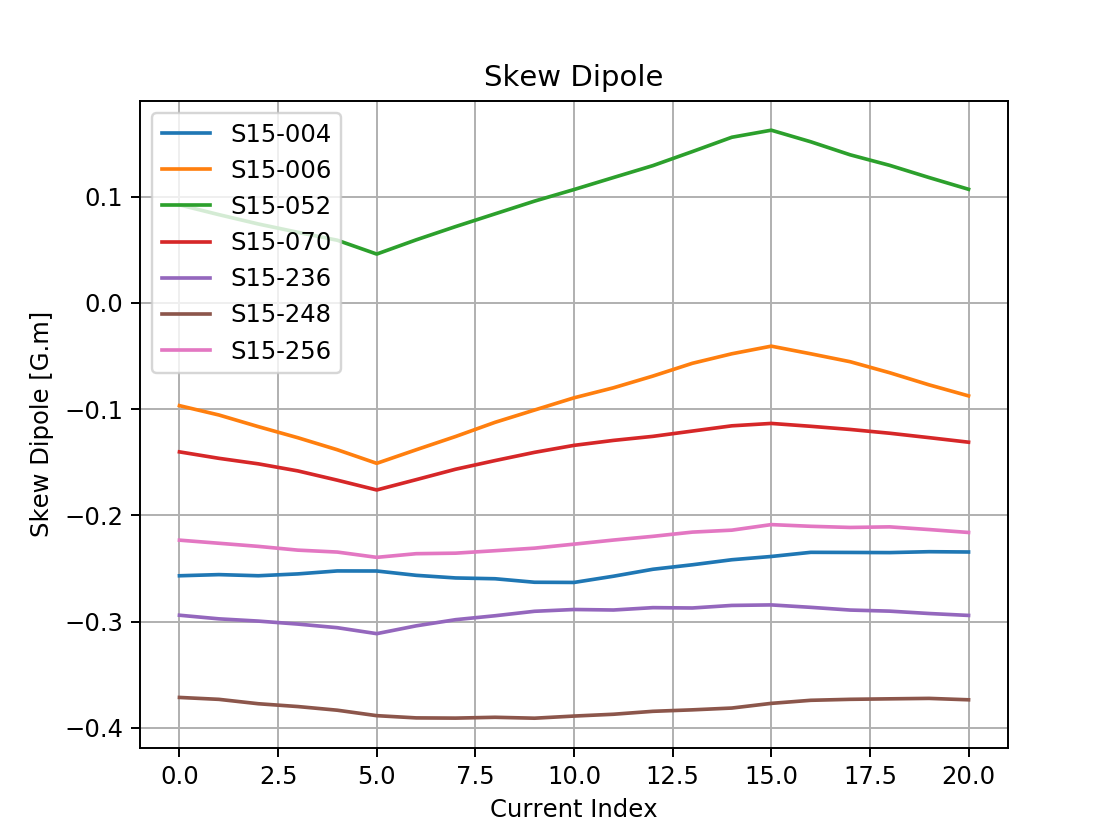

In [6]:
# Skew Quadrupole
serials, tdata = data[0], data[7]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Quadrupole [T]')
plt.title('Skew Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Skew Sextupole
serials, tdata = data[0], data[8]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Sextupole [T/m]')
plt.title('Skew Sextupole')
plt.legend()
plt.grid()
plt.show()

# Skew Dipole
serials, tdata = data[0], data[6]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Dipole [G.m]')
plt.title('Skew Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


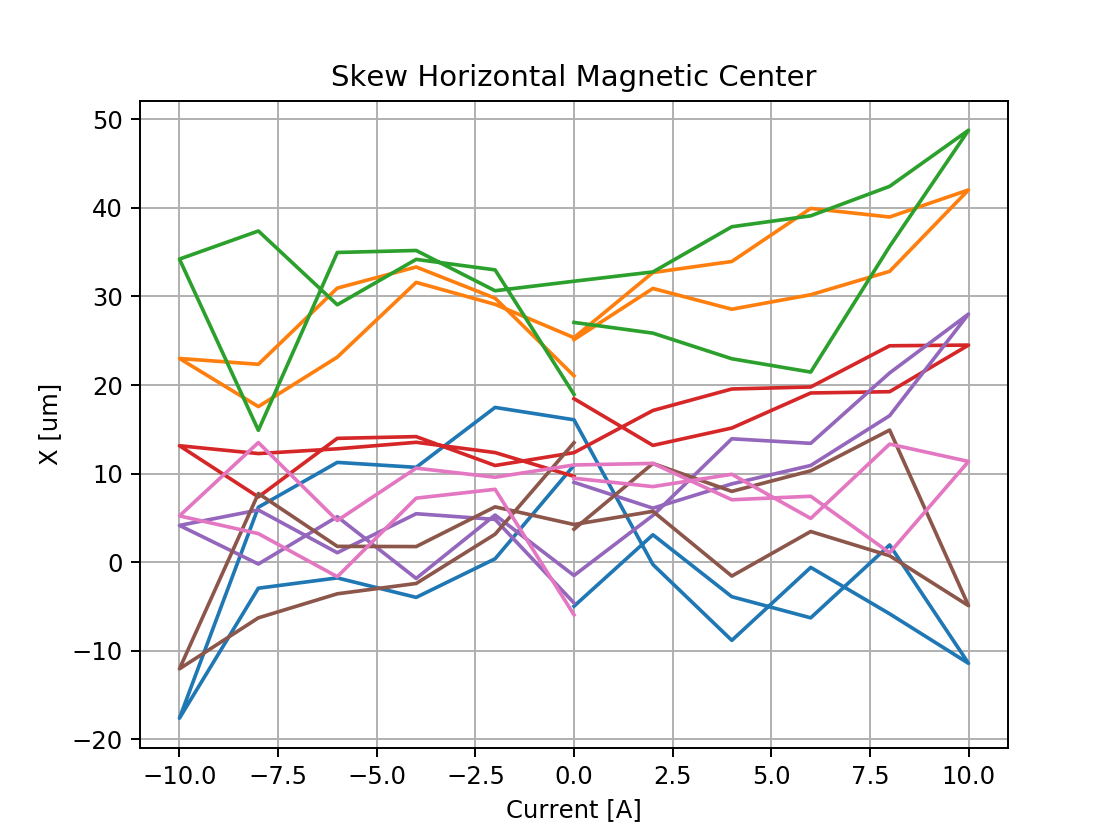

<IPython.core.display.Javascript object>


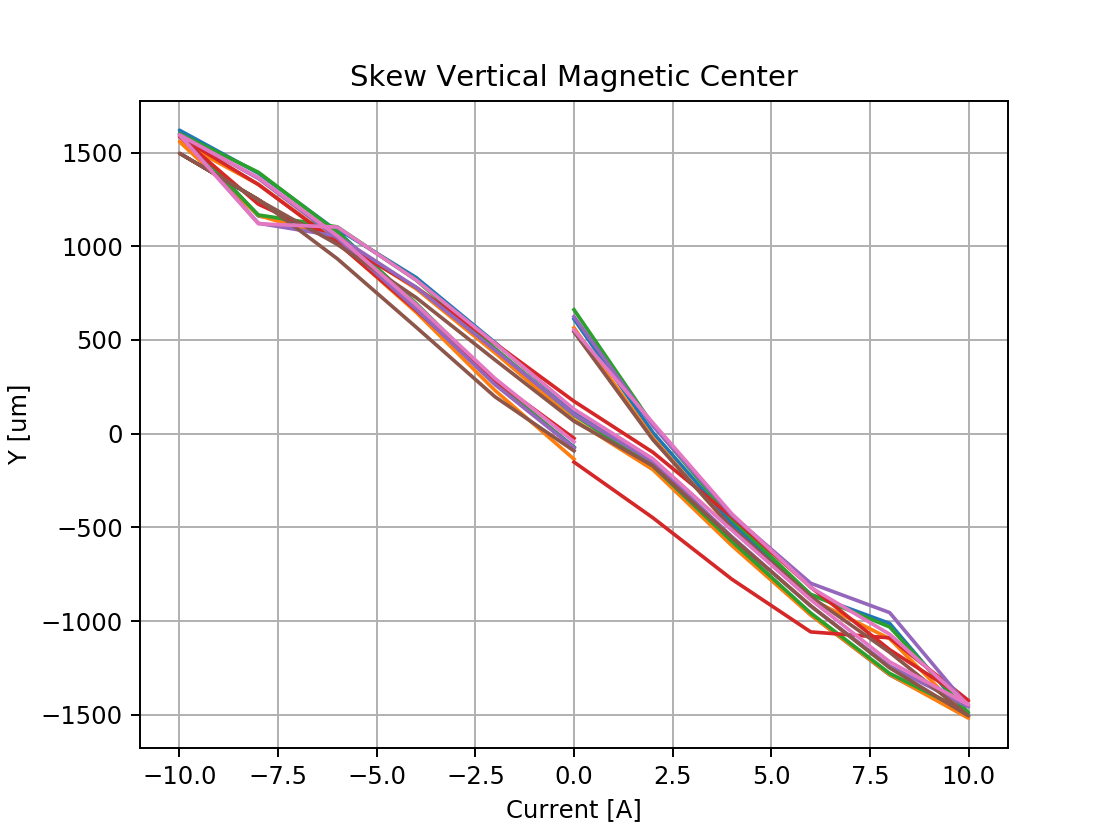

<IPython.core.display.Javascript object>


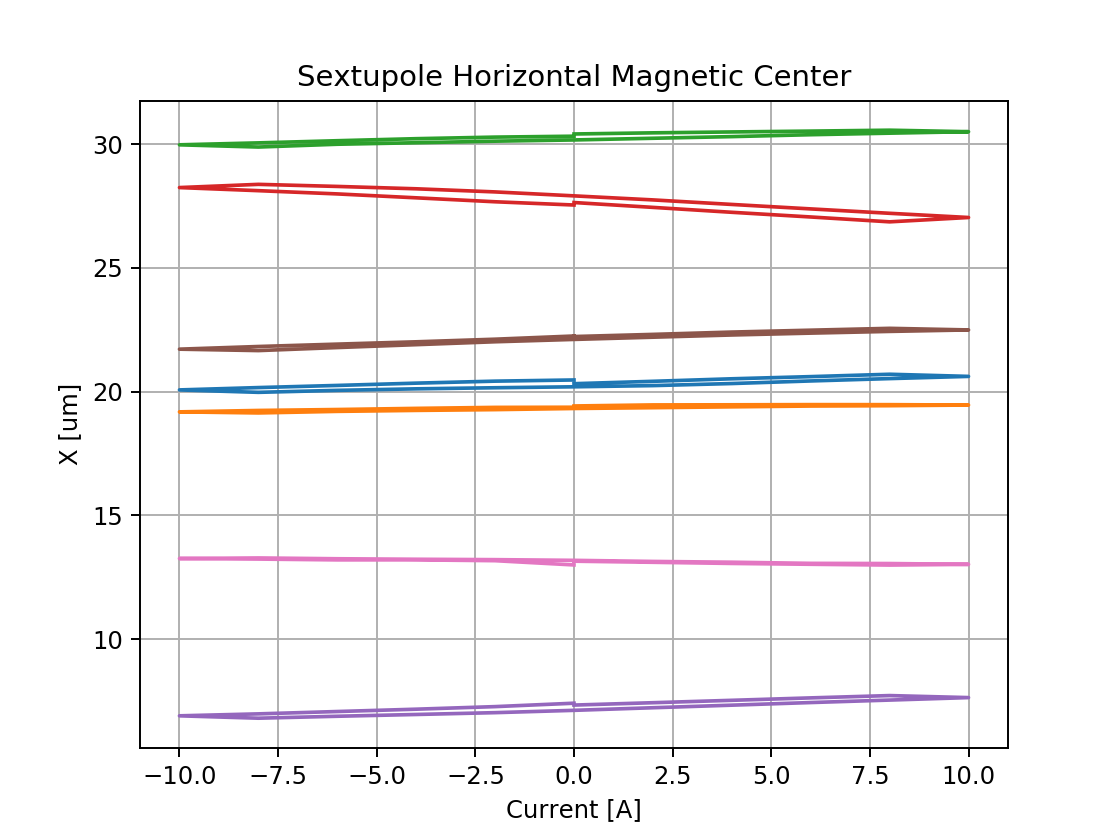

<IPython.core.display.Javascript object>


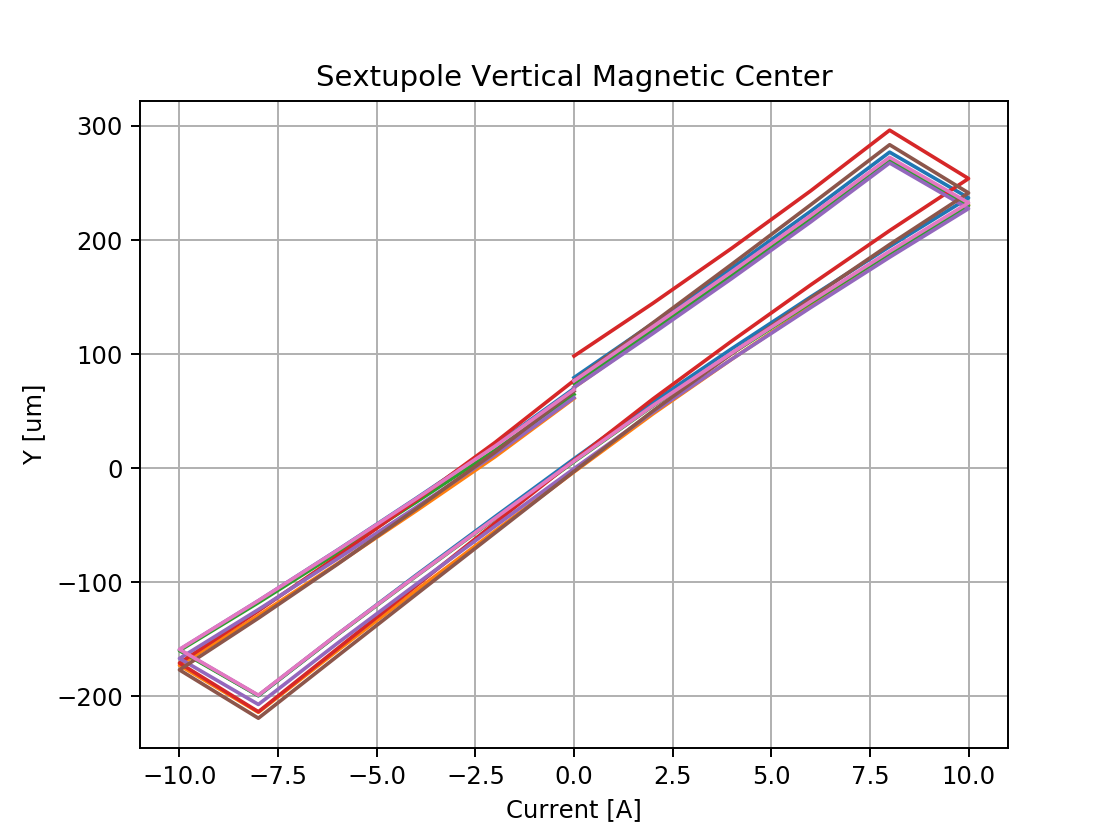

In [7]:
serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2 = data
    
shape = main_coil_current_avg.shape

ind = np.array([i for i in range(shape[1])])
step = 1.0

zskew = []
zsext = []
Il = []
for j in range(shape[0]):
    D = nmpole_0[j,:] + 1j * smpole_0[j,:]
    Q = nmpole_1[j,:] + 1j * smpole_1[j,:]
    S = nmpole_2[j,:] + 1j * smpole_2[j,:]
    fD = interp1d(ind, D, kind='cubic', fill_value='extrapolate')
    fQ = interp1d(ind, Q, kind='cubic', fill_value='extrapolate')
    fS = interp1d(ind, S, kind='cubic', fill_value='extrapolate')
    fI = interp1d(ind, qs_coil_current_avg[j,:], kind='cubic', fill_value='extrapolate')
    Dl = (fD(ind + step) - fD(ind - 0*step/2))/step
    Ql = (fQ(ind + step) - fQ(ind - 0*step/2))/step
    QlSext = fQ(ind + step)
    Sl = fS(ind + step)
    Il.append(fI(ind))  
    zskew.append(-Dl/Ql)
    zsext.append(-QlSext/Sl/2.0)
    

# plot skew center 

plt.figure()
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(Il[i], 1e6*np.real(z))
plt.xlabel('Current [A]')
plt.ylabel('X [um]')
plt.grid()
plt.title('Skew Horizontal Magnetic Center')
plt.show()

plt.figure()
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(Il[i], 1e6*np.imag(z))
plt.xlabel('Current [A]')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Skew Vertical Magnetic Center')
plt.show()


# plot sextupole center 

plt.figure()
for i in range(len(zsext)):
    z = zsext[i]
    plt.plot(Il[i], 1e6*np.real(z))
plt.xlabel('Current [A]')
plt.ylabel('X [um]')
plt.grid()
plt.title('Sextupole Horizontal Magnetic Center')
plt.show()

plt.figure()
for i in range(len(zsext)):
    z = zsext[i]
    plt.plot(Il[i], 1e6*np.imag(z))
plt.xlabel('Current [A]')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Sextupole Vertical Magnetic Center')
plt.show()